In [42]:
# open the file 
import pandas as pd



In [43]:
sg2 = "C:/Ironhack/ih - projects/Redefining-Academic-Success-Beyond-Grades-and-Dropout-Rates/Students_Grading_Dataset2.json"
dataset =pd.read_json(sg2)

dataset.shape


(5000, 23)

In [44]:
dataset.dtypes

Student_ID                     object
First_Name                     object
Last_Name                      object
Email                          object
Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object

In [45]:
# drop unnecessary coloumns
dataset.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)



In [46]:
dataset['Gender'].value_counts()


Gender
Male      2551
Female    2449
Name: count, dtype: int64

In [47]:
print(dataset['Gender'].isnull().sum())  
print(dataset['Gender'].unique())

0
['Female' 'Male']


In [48]:
print(dataset['Age'].isnull().sum())  
print(dataset['Age'].unique())

0
[22 18 24 23 21 19 20]


In [49]:
print(dataset['Department'].isnull().sum())  
print(dataset['Department'].unique())

0
['Mathematics' 'Business' 'Engineering' 'CS']


In [50]:
dataset.rename(columns={'Attendance (%)': 'Attendance_Percent'}, inplace=True)
dataset.rename(columns={"Stress_Level (1-10)" : "Stress_Level"}, inplace=True)

In [51]:
dataset.describe()

,Age,Attendance_Percent,Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level,Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,4.996372,74.78305,75.021860,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,2.898978,14.54243,14.323246,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.010000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,2.507500,61.97000,62.710000,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,4.960000,74.54000,75.345000,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,7.550000,87.63000,87.060000,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,10.000000,100.00000,99.990000,30.000000,10.000000,9.000000


<module 'matplotlib.pyplot' from 'c:\\Users\\49151\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

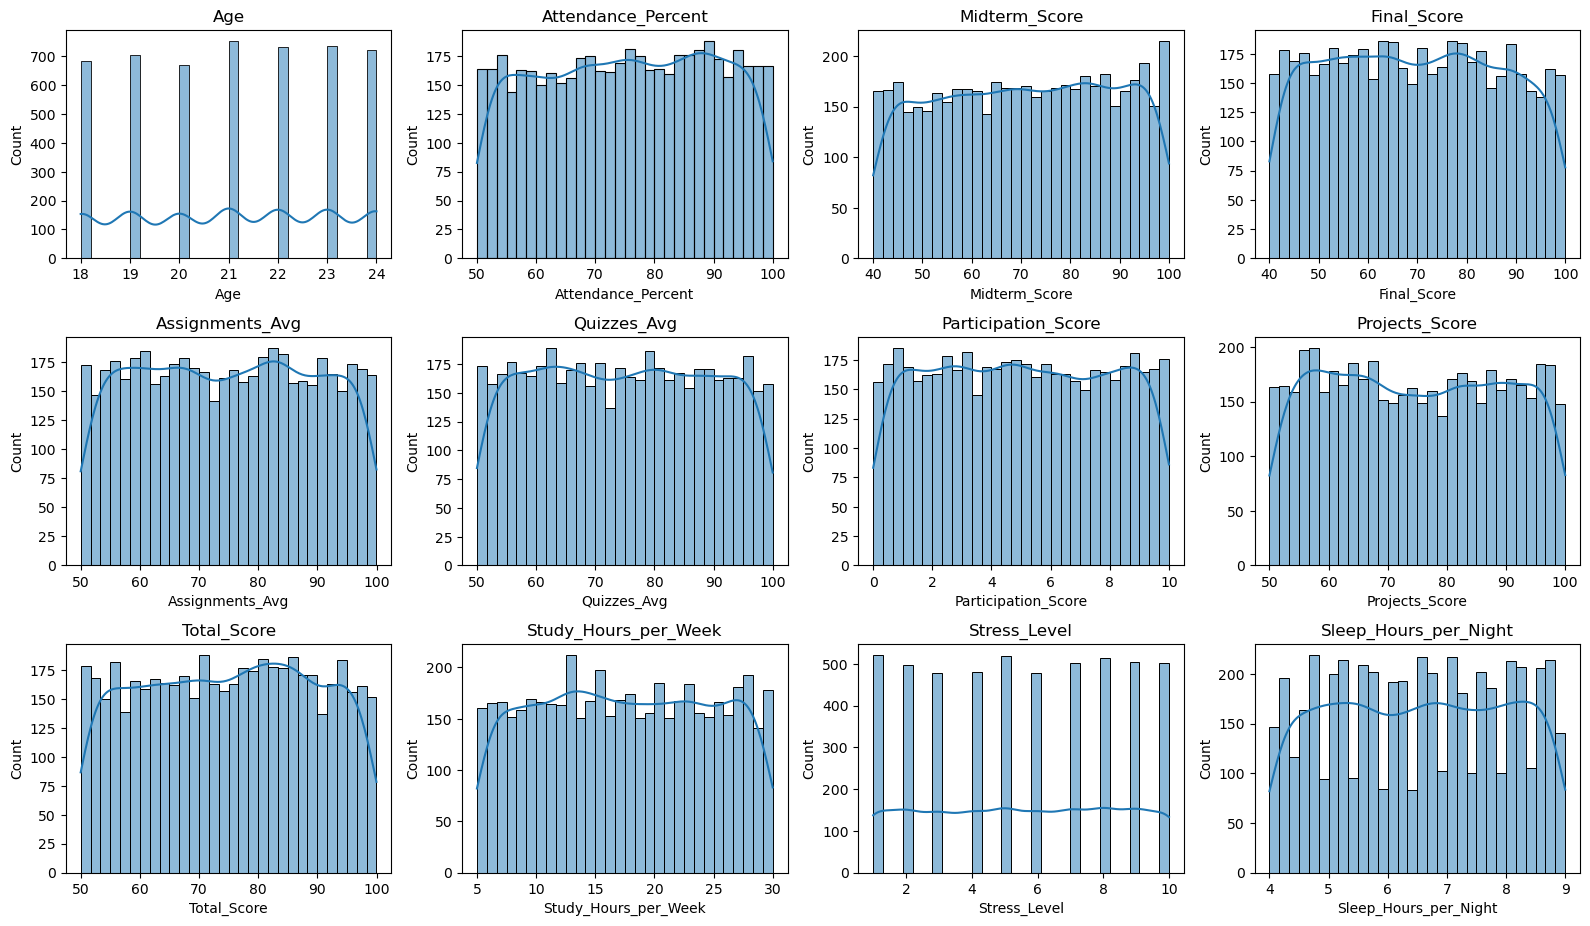

In [52]:
# Histograms for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

plt

Data Transformation and Normalization


In [53]:
# Encode Categorical Features
# Ordinal categories
#Grade
grade_order = ['F', 'D', 'C', 'B', 'A']
dataset['Grade'] = dataset['Grade'].astype('category').cat.set_categories(grade_order, ordered=True).cat.codes

# Parental Educational level
education_order = ['None', 'High School', "Bachelor's", "Master's", 'PhD']
dataset['Parent_Education_Level'] = dataset['Parent_Education_Level'].astype('category').cat.set_categories(education_order, ordered=True).cat.codes

# Family income level
income_order = ['Low', 'Medium', 'High']
dataset['Family_Income_Level'] = dataset['Family_Income_Level'].astype('category').cat.set_categories(income_order, ordered=True).cat.codes


In [54]:
# Nominal Categories
dataset = pd.get_dummies(dataset, columns=['Gender', 'Department'], drop_first=True)


In [55]:
# Encoding for Booleans
bool_map = {'Yes': 1, 'No': 0}
dataset['Extracurricular_Activities'] = dataset['Extracurricular_Activities'].map(bool_map)
dataset['Internet_Access_at_Home'] = dataset['Internet_Access_at_Home'].map(bool_map)


In [57]:
# Scaling Numerical Features
numerical_features = [
    'Age',
    'Attendance_Percent',
    'Midterm_Score',
    'Final_Score',
    'Assignments_Avg',
    'Quizzes_Avg',
    'Participation_Score',
    'Projects_Score',
    'Total_Score',
    'Study_Hours_per_Week',
    'Stress_Level',
    'Sleep_Hours_per_Night'
]

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset[numerical_features])
dataset[numerical_features] = pd.DataFrame(scaled_data, columns=numerical_features)


In [59]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5000 non-null   float64
 1   Attendance_Percent          5000 non-null   float64
 2   Midterm_Score               5000 non-null   float64
 3   Final_Score                 5000 non-null   float64
 4   Assignments_Avg             5000 non-null   float64
 5   Quizzes_Avg                 5000 non-null   float64
 6   Participation_Score         5000 non-null   float64
 7   Projects_Score              5000 non-null   float64
 8   Total_Score                 5000 non-null   float64
 9   Grade                       5000 non-null   int8   
 10  Study_Hours_per_Week        5000 non-null   float64
 11  Extracurricular_Activities  5000 non-null   int64  
 12  Internet_Access_at_Home     5000 non-null   int64  
 13  Parent_Education_Level      5000 

Feature Engineering


In [60]:
# Creating new success metrics
# Consistency Score
# How steady is a student’s performance?
dataset["Consistency_Score"] = dataset[["Assignments_Avg", "Quizzes_Avg", "Projects_Score"]].std(axis=1)
dataset["Consistency_Score"] = 1 / (1 + dataset["Consistency_Score"]) 


In [61]:
#Engagement Index
#How involved is the student in their learning environment?
dataset["Engagement_Index"] = (
    0.4 * dataset["Participation_Score"] +
    0.4 * dataset["Attendance_Percent"] +
    0.2 * dataset["Extracurricular_Activities"].apply(lambda x: 1 if x == "Yes" else 0)
)

In [63]:
#Resilience
# How well does a student perform despite stress?
dataset["Performance_Mean"] = dataset[["Midterm_Score", "Final_Score", "Assignments_Avg"]].mean(axis=1)
dataset["Resilience"] = dataset["Performance_Mean"] / (1 + dataset["Stress_Level"])



In [67]:
# Adaptability
# Does the student adapt or improve over time?
dataset["Adaptability"] = dataset[[
    "Consistency_Score", "Engagement_Index", "Resilience"
]].mean(axis=1)



In [69]:
# Defining The Target As Success
dataset["Success_Score"] = (
    0.1 * dataset["Final_Score"] +
    0.2 * dataset["Consistency_Score"] +
    0.2 * dataset["Adaptability"] +
    0.25 * dataset["Engagement_Index"] +
    0.25 * dataset["Resilience"]
)
